In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA


# data clean and analysis

In [22]:
train = pd.read_csv('train.csv')
train = train.iloc[:,:-1]
train.to_csv('train_no_id.csv')
test = pd.read_csv('test.csv')
test = test.iloc[:,:-1]
test.to_csv('test_no_id.csv')

In [33]:
def basic_analysis(data):
    for i in range(len(data.columns)):
        tmp = data.iloc[:,i]
        plt.hist(tmp,bins = 100)
        plt.show()
    

<AxesSubplot:>

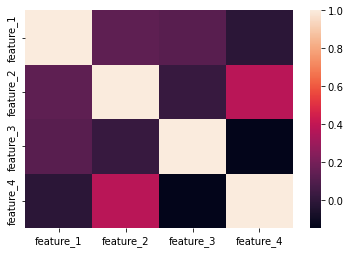

In [30]:
sns.heatmap(test.corr())

<AxesSubplot:>

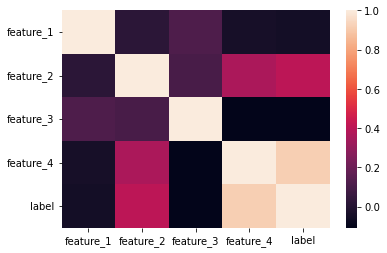

In [31]:
sns.heatmap(train.corr())

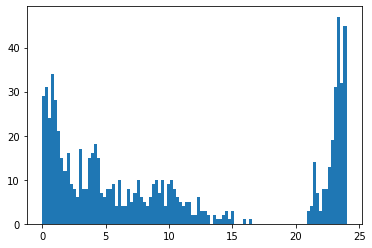

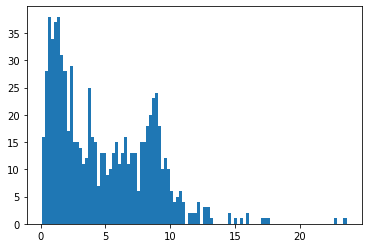

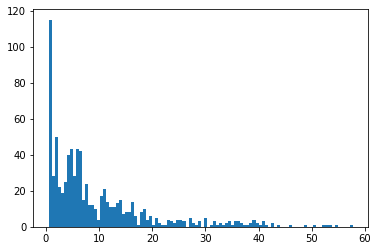

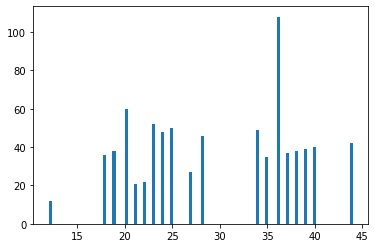

114154


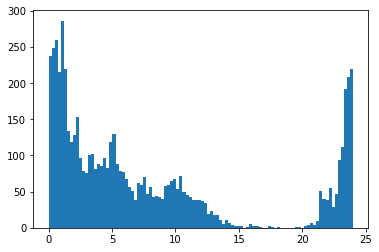

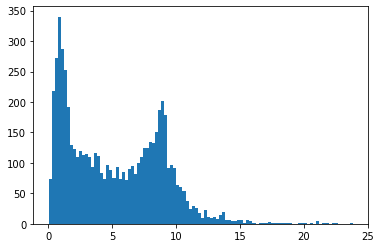

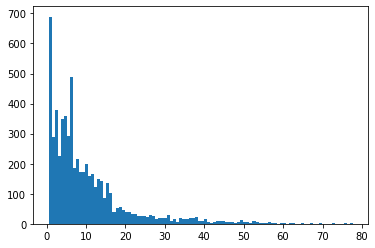

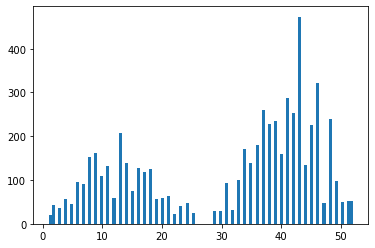

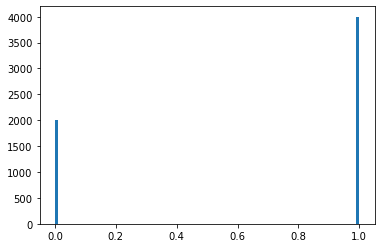

In [34]:
basic_analysis(test)
print(114154)
basic_analysis(train)

# ML ALGORITHM

## GMM

In [47]:
# ML ALGORITHM
X = train.iloc[:,:-1]
Y = train.iloc[:,-1]
gmm = GaussianMixture(n_components=2,random_state=42)
gmm.fit(X)
predicted = gmm.predict(test)
predicted_df = pd.DataFrame(pd.read_csv('test.csv').iloc[:,-1])
predicted_df['prediction'] = predicted
predicted_df.to_csv('./submission1.csv', index=False)
#90.75%

In [100]:
test

,feature_1,feature_2,feature_3,feature_4
0,2.919722,4.300000,0.834,19.0
1,23.430556,9.173056,6.033,23.0
2,0.781944,6.190000,29.728,34.0
3,7.342778,0.353611,0.573,25.0
4,0.989444,8.069722,11.259,34.0
...,...,...,...,...
795,3.643333,2.845833,5.795,34.0
796,0.500000,10.516111,6.244,36.0
797,7.449167,1.388056,4.734,39.0
798,10.128889,1.144167,35.184,20.0


In [123]:
#minmax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_minmax = pd.DataFrame(columns=['feature_4'])
scaler.fit(test.iloc[:,3].values.reshape(-1,1))
test_minmax['feature_4'] = scaler.transform(test.iloc[:,3].values.reshape(-1,1)).reshape(1,-1)[0]
gmm = GaussianMixture(n_components=2)
gmm.fit(test_minmax)
predicted = gmm.predict(test_minmax)
predicted_df = pd.DataFrame(pd.read_csv('test.csv').iloc[:,-1])
predicted_df['prediction'] = predicted
predicted_df.to_csv('./tmp.csv', index=False)

### draw the plot of gmm

In [126]:
colors = ["navy", "turquoise"]
tmp = pd.read_csv('tmp.csv').iloc[:,1]
#test_minmax['useless_feature'] = np.zeros(len(tmp))
#test_minmax['predicted_y'] = predicted
test['useless_feature'] = np.zeros(len(tmp))
test['predicted'] = predicted
#test_matrix = test_minmax.values
test_matrix = test.iloc[:,3:6].values
test_matrix


array([[19.,  0.,  1.],
       [23.,  0.,  1.],
       [34.,  0.,  0.],
       ...,
       [39.,  0.,  0.],
       [20.,  0.,  1.],
       [36.,  0.,  0.]])

388
412


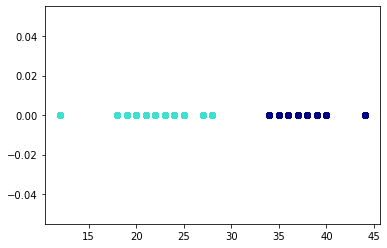

In [128]:
for i, color in enumerate(colors):
        data = test_matrix[test_matrix[:,2] == i][:,0:2]
        print(len(data))
        plt.scatter(data[:, 0], data[:, 1], color=color)

## K-means

In [48]:
X = train.iloc[:,:-1]
Y = train.iloc[:,-1]
kmea = KMeans(n_clusters=2)
kmea.fit(X)
predicted = kmea.predict(test)
predicted_df = pd.DataFrame(pd.read_csv('test.csv').iloc[:,-1])
predicted_df['prediction'] = predicted
predicted_df.to_csv('./submission2.csv', index=False)
#90.05%

In [99]:
train_data, val_data = train_test_split(train, test_size=0.1)
X = train_data.iloc[:,3].values.reshape(-1,1)
Y = train.iloc[:,-1].values
kmea.fit(X)
predicted = kmea.predict(val_data.iloc[:,3].values.reshape(-1,1))
gt_y = val_data.iloc[:,-1]
print(np.sum(predicted-gt_y))
test_predict = kmea.predict(test.iloc[:,3].values.reshape(-1,1))
predicted_df = pd.DataFrame(pd.read_csv('test.csv').iloc[:,-1])
predicted_df['prediction'] = test_predict
predicted_df.to_csv('./submission.csv', index=False)

-11


In [ ]:
X = test.values.reshape(-1,1)
kmea.fit(X)
predicted = kmea.predict()
test_predict = kmea.predict(test.iloc[:,3].values.reshape(-1,1))
predicted_df = pd.DataFrame(pd.read_csv('test.csv').iloc[:,-1])
predicted_df['prediction'] = test_predict
predicted_df.to_csv('./submission.csv', index=False)

## Kmeans one feature

In [ ]:
train_data, val_data = train_test_split(train, test_size=0.2)
X = train_data.iloc[:,4]

In [58]:
df1 = pd.read_csv('submission.csv').iloc[:,1].values
df2 = pd.read_csv('submission1.csv').iloc[:,1].values
np.sum(df2-df1)

-244

# SVM